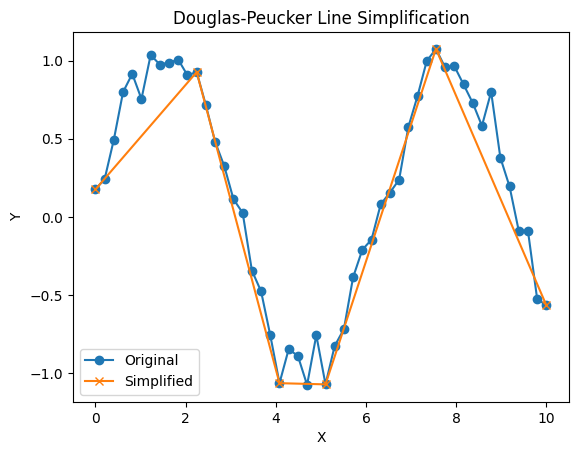

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def douglas_peucker(points, epsilon):
    if len(points) <= 2:
        return points
    
    dmax = 0
    index = 0
    
    for i in range(1, len(points) - 1):
        d = perpendicular_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    
    if dmax > epsilon:
        recursive_result1 = douglas_peucker(points[:index + 1], epsilon)
        recursive_result2 = douglas_peucker(points[index:], epsilon)
        return np.concatenate((recursive_result1[:-1], recursive_result2))
    else:
        return np.array([points[0], points[-1]])

def perpendicular_distance(p, p1, p2):
    # Calculate the perpendicular distance of point p from line formed by p1 and p2
    return np.abs(np.cross(p2 - p1, p - p1)) / np.linalg.norm(p2 - p1)

# Generate example data
np.random.seed(0)
num_points = 50
x = np.linspace(0, 10, num_points)
y = np.sin(x) + np.random.normal(0, 0.1, num_points)
points = np.column_stack((x, y))

# Perform Douglas-Peucker simplification
epsilon = 0.5
simplified_points = douglas_peucker(points, epsilon)

# Plot the original and simplified polylines
plt.plot(points[:, 0], points[:, 1], marker='o', label='Original')
plt.plot(simplified_points[:, 0], simplified_points[:, 1], marker='x', label='Simplified')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Douglas-Peucker Line Simplification')
plt.show()


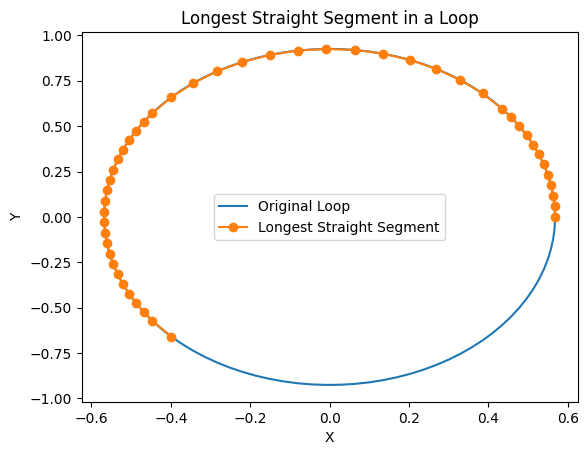

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def longest_straight_segment(points, threshold):
    n = len(points)
    dp = np.zeros(n)
    prev = np.zeros(n, dtype=int)

    for i in range(n):
        max_length = 0
        max_prev = -1
        
        for j in range(i - 1, -1, -1):
            if np.linalg.norm(points[i] - points[j]) <= threshold:
                length = np.linalg.norm(points[i] - points[j])
                if length > max_length:
                    max_length = length
                    max_prev = j
        
        dp[i] = max_length
        prev[i] = max_prev
    
    max_length = np.max(dp)
    end_index = np.argmax(dp)
    longest_segment = []
    
    while end_index != -1:
        longest_segment.append(points[end_index])
        end_index = prev[end_index]
    
    longest_segment.reverse()
    return np.array(longest_segment)

# Generate example data
# np.random.seed(0)
num_points = 100
theta = np.linspace(0, 2 * np.pi, num_points)
x = np.cos(theta)*np.random.rand()
y = np.sin(theta)*np.random.rand()
points = np.column_stack((x, y))

# Set the threshold for the "straightness" metric
threshold = 0.1

# Find the longest straight segment
longest_segment = longest_straight_segment(points, threshold)

# Plot the original loop and the longest straight segment
plt.plot(points[:, 0], points[:, 1], label='Original Loop')
plt.plot(longest_segment[:, 0], longest_segment[:, 1], marker='o', label='Longest Straight Segment')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Longest Straight Segment in a Loop')
plt.show()
